<a href="https://colab.research.google.com/github/JaishreeSha/Falldetection/blob/main/Falldetction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
train_dir = '/content/drive/MyDrive/Dataset/train'
validation_dir ='/content/drive/MyDrive/Dataset/test'


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(img_input, output)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1849

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 374 images belonging to 2 classes.
Found 111 images belonging to 2 classes.


In [ ]:
history=model.fit(train_generator,epochs = 12,validation_data = validation_generator)

Epoch 1/12
19/19 [==============================] - 13s 616ms/step - loss: 1.8683 - acc: 0.5267 - val_loss: 0.6404 - val_acc: 0.7117
Epoch 2/12
19/19 [==============================] - 12s 622ms/step - loss: 0.7950 - acc: 0.6497 - val_loss: 0.7175 - val_acc: 0.4324
Epoch 3/12
19/19 [==============================] - 11s 595ms/step - loss: 0.5659 - acc: 0.7246 - val_loss: 0.6046 - val_acc: 0.6216
Epoch 4/12
19/19 [==============================] - 12s 636ms/step - loss: 0.4603 - acc: 0.7594 - val_loss: 0.7812 - val_acc: 0.5495
Epoch 5/12
19/19 [==============================] - 11s 594ms/step - loss: 0.4465 - acc: 0.8128 - val_loss: 0.9932 - val_acc: 0.5315
Epoch 6/12
19/19 [==============================] - 12s 603ms/step - loss: 0.3221 - acc: 0.8824 - val_loss: 2.1386 - val_acc: 0.4865
Epoch 7/12
19/19 [==============================] - 11s 596ms/step - loss: 0.2734 - acc: 0.9011 - val_loss: 2.6153 - val_acc: 0.4685
Epoch 8/12
19/19 [==============================] - 11s 598ms/step - 

In [ ]:
# Saving Model
model.save(filepath='/content/drive/MyDrive/Dataset/fall_detection_model.h5', overwrite=True)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
img = load_image('/content/drive/MyDrive/Dataset/test/Fall/fall001.jpg')
# predict the class
result = model.predict(img)
if(result[0]==1):
  print("Fall")
else:
  print("Not Fall")

Fall


In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing import image
y_actual, y_test = [],[]
for i in os.listdir("/content/drive/MyDrive/Dataset/train/Notfall/"):
    img=image.load_img("/content/drive/MyDrive/Dataset/train/Notfall/"+i,target_size=(150,150))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(int(pred[0,0]))
    y_actual.append(1)

for i in os.listdir("/content/drive/MyDrive/Dataset/train/Fall/"):
    img=image.load_img("/content/drive/MyDrive/Dataset/train/Fall/"+i,target_size=(150,150))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(int(pred[0,0]))
    y_actual.append(0)

In [ ]:
from sklearn import metrics

expected_y  = y_actual
y_pred= y_test

# summarize the fit of the model
print(); print(metrics.classification_report(expected_y,y_pred))
print(); print(metrics.confusion_matrix(expected_y, y_pred))
print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       208
           1       0.95      0.98      0.96       166

    accuracy                           0.97       374
   macro avg       0.96      0.97      0.96       374
weighted avg       0.97      0.97      0.97       374


[[199   9]
 [  4 162]]
Accuracy:   0.9652406417112299


In [ ]:
# calculate accuracy
y_test=y_actual
from sklearn import metrics
print("ACCURACY:")
print(metrics.accuracy_score(y_test, y_pred))
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("sensitivity")
print(metrics.recall_score(y_test, y_pred))
print("True Positive Rate")
specificity = TN / (TN + FP)
print(specificity)
false_positive_rate = FP / float(TN + FP)
print("false_positive_rate")
print(false_positive_rate)
print("precision")
print(metrics.precision_score(y_test, y_pred))
print("ROC_AUC_SCORE")
print(metrics.roc_auc_score(y_test, y_pred))
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

ACCURACY:
0.9652406417112299
[[199   9]
 [  4 162]]
sensitivity
0.9759036144578314
True Positive Rate
0.9567307692307693
false_positive_rate
0.04326923076923077
precision
0.9473684210526315
ROC_AUC_SCORE
0.9663171918443004
F-Measure: 0.961


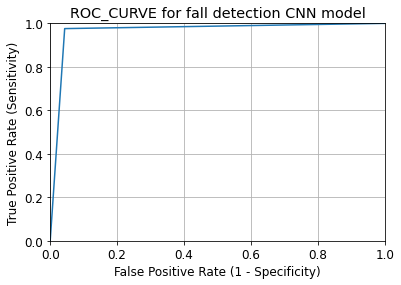

In [ ]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC_CURVE for fall detection CNN model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

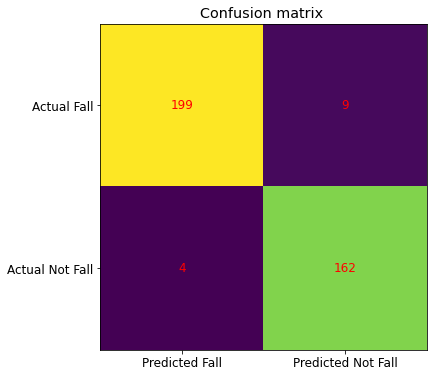

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Fall', 'Predicted Not Fall'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Fall', 'Actual Not Fall'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.title("Confusion matrix ")
plt.show()